In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

In [2]:
%matplotlib inline
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('insta_fake_account_dectection_modified.csv')

In [4]:
df.head()

,Unnamed: 0,userFollowerCount,userFollowingCount,userBiographyLength,userMediaCount,userHasProfilPic,userIsPrivate,usernameDigitCount,usernameLength,isFake
0,0,3,76,0,0,1,1,2,12,1
1,1,152,966,0,6,1,0,0,9,0
2,2,319,429,0,68,1,1,0,7,0
3,3,557,703,0,60,1,0,0,11,0
4,4,695,635,25,21,1,0,0,9,0


In [5]:
df.shape

(1194, 10)

In [6]:
df.drop(['Unnamed: 0'],axis=1,inplace=True)

## Feature Scaling

In [7]:
df.columns

Index(['userFollowerCount', 'userFollowingCount', 'userBiographyLength',
       'userMediaCount', 'userHasProfilPic', 'userIsPrivate',
       'usernameDigitCount', 'usernameLength', 'isFake'],
      dtype='object')

In [8]:
columns_to_scale = ['userFollowerCount', 'userFollowingCount', 'userBiographyLength',
       'userMediaCount', 'usernameDigitCount', 'usernameLength']

In [9]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df[columns_to_scale] = scaler.fit_transform(df[columns_to_scale])

In [10]:
X = df.drop(['isFake'],axis=1)
Y = df['isFake']

In [11]:
X.head()

,userFollowerCount,userFollowingCount,userBiographyLength,userMediaCount,userHasProfilPic,userIsPrivate,usernameDigitCount,usernameLength
0,0.000668,0.010137,0.000000,0.000000,1,1,0.2,0.28
1,0.033838,0.128852,0.000000,0.005671,1,0,0.0,0.16
2,0.071015,0.057223,0.000000,0.064272,1,1,0.0,0.08
3,0.123998,0.093771,0.000000,0.056711,1,0,0.0,0.24
4,0.154720,0.084701,0.166667,0.019849,1,0,0.0,0.16


<AxesSubplot:ylabel='isFake'>

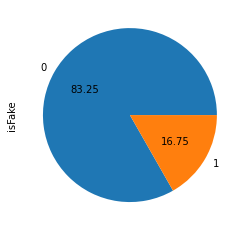

In [12]:
Y.value_counts().plot(kind='pie',autopct="%.2f")

In [13]:
from imblearn.over_sampling import SMOTE

In [14]:
smote = SMOTE(sampling_strategy='minority')
X,Y = smote.fit_resample(X,Y)
X.shape,Y.shape

((1988, 8), (1988,))

<AxesSubplot:ylabel='isFake'>

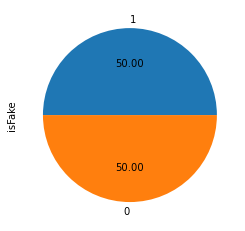

In [15]:
Y.value_counts().plot(kind='pie',autopct="%.2f")

## Train and Test Data

In [16]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=0.3)
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((1391, 8), (597, 8), (1391,), (597,))

## ANN model

In [17]:
from tensorflow import keras

In [18]:
model = keras.Sequential([
    keras.layers.Dense(11,input_shape=(8,),activation='relu'),
    keras.layers.Dense(2,activation='softmax'),
    
])

In [19]:
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [20]:
model.fit(x_train,y_train,epochs=100)

Epoch 1/100
44/44 [==============================] - 0s 2ms/step - loss: 0.7041 - accuracy: 0.5838
Epoch 2/100
44/44 [==============================] - 0s 2ms/step - loss: 0.6650 - accuracy: 0.6571
Epoch 3/100
44/44 [==============================] - 0s 2ms/step - loss: 0.6324 - accuracy: 0.6930
Epoch 4/100
44/44 [==============================] - 0s 2ms/step - loss: 0.5964 - accuracy: 0.7714
Epoch 5/100
44/44 [==============================] - 0s 1ms/step - loss: 0.5548 - accuracy: 0.8339
Epoch 6/100
44/44 [==============================] - 0s 1ms/step - loss: 0.5053 - accuracy: 0.8562
Epoch 7/100
44/44 [==============================] - 0s 1ms/step - loss: 0.4520 - accuracy: 0.8613
Epoch 8/100
44/44 [==============================] - 0s 2ms/step - loss: 0.4019 - accuracy: 0.8577
Epoch 9/100
44/44 [==============================] - 0s 2ms/step - loss: 0.3725 - accuracy: 0.8613
Epoch 10/100
44/44 [==============================] - 0s 2ms/step - loss: 0.3511 - accuracy: 0.8627
Epoch 11/

44/44 [==============================] - 0s 3ms/step - loss: 0.1598 - accuracy: 0.9310
Epoch 84/100
44/44 [==============================] - 0s 2ms/step - loss: 0.1587 - accuracy: 0.9317
Epoch 85/100
44/44 [==============================] - 0s 3ms/step - loss: 0.1588 - accuracy: 0.9331
Epoch 86/100
44/44 [==============================] - 0s 2ms/step - loss: 0.1584 - accuracy: 0.9317
Epoch 87/100
44/44 [==============================] - 0s 1ms/step - loss: 0.1574 - accuracy: 0.9317
Epoch 88/100
44/44 [==============================] - 0s 1ms/step - loss: 0.1569 - accuracy: 0.9331
Epoch 89/100
44/44 [==============================] - 0s 1ms/step - loss: 0.1570 - accuracy: 0.9317
Epoch 90/100
44/44 [==============================] - 0s 1ms/step - loss: 0.1561 - accuracy: 0.9346
Epoch 91/100
44/44 [==============================] - 0s 1ms/step - loss: 0.1557 - accuracy: 0.9324
Epoch 92/100
44/44 [==============================] - 0s 1ms/step - loss: 0.1551 - accuracy: 0.9389
Epoch 93/100


In [21]:
model.evaluate(x_test,y_test)

19/19 [==============================] - 0s 2ms/step - loss: 0.1406 - accuracy: 0.9464


[0.14055009186267853, 0.9463986754417419]

In [22]:
from sklearn.metrics import confusion_matrix, classification_report

In [23]:
y_test_predict = [np.argmax(i) for i in model.predict(x_test)]
y_test_cm = confusion_matrix(y_test,y_test_predict)

19/19 [==============================] - 0s 1ms/step


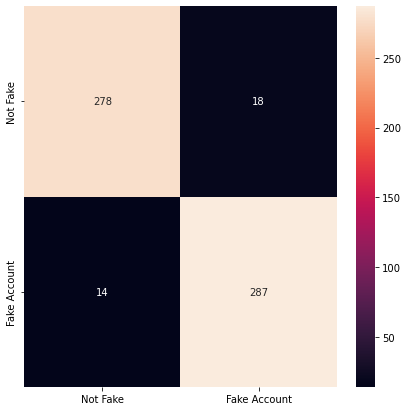

In [24]:
plt.figure(figsize=(7,7))
sns.heatmap(y_test_cm,annot=True,fmt='g',xticklabels=['Not Fake','Fake Account'],yticklabels=['Not Fake','Fake Account'])
plt.show()


In [25]:
print(classification_report(y_test,y_test_predict))


              precision    recall  f1-score   support

           0       0.95      0.94      0.95       296
           1       0.94      0.95      0.95       301

    accuracy                           0.95       597
   macro avg       0.95      0.95      0.95       597
weighted avg       0.95      0.95      0.95       597

